# How to scrap basic datas on luxury bags using Python

*In this project, I will scrap basic datas (concerning price, matter, size etc) from the website presenting the bags of a well-known luxury brand. The aim of this project is basically to create a dataset containing all the datas I will need, to do further analysis on the second-hand luxury sector. The long-term purpose is basically to learn how to do web scraping with Python.*

*You cand find the website (containing all the bags) from which I will work [here](https://www.collectorsquare.com/sacs/louis-vuitton/?filters[genders][0]=lad&filters[bag_category][0]=bag-xxxxx&filters[bag_category][1]=shoulderx&filters[bag_category][2]=shoppgbag&filters[bag_category][3]=backpabag&filters[bag_category][4]=luggage-x&filters[bag_category][5]=businessx&filters[bag_category][6]=pockthand&filters[bag_category][7]=other-bag).*

*But first, I will work from a [particular bag](https://www.collectorsquare.com/sacs/louis-vuitton/keepall/sac-de-voyage-louis-vuitton-keepall-45-en-toile-monogram-et-cuir-naturel-346683.html) to create the workflow.*

In [1]:
import pandas as pd
import re
import requests
from bs4 import BeautifulSoup

link = "https://www.collectorsquare.com/sacs/louis-vuitton/keepall/sac-de-voyage-louis-vuitton-keepall-45-en-toile-monogram-et-cuir-naturel-346683.html"

page = requests.get(link)
soup = BeautifulSoup(page.content, 'html.parser')

print(type(page))
print(type(soup))

<class 'requests.models.Response'>
<class 'bs4.BeautifulSoup'>


## I. Creating the framework of our dataset

___

In [2]:
col_names = ["Photo_link", "Brand", "Item_name", "Matter", "Size", "Reselling_price", "Conditions", "Modele", "Link"]

bags = pd.DataFrame(columns=col_names)

## II. Starting to scrap basic datas

___

In [3]:
# From our "bs4.BeautifulSoup" object, we can print out the HTML content of the page,
# formatted nicely, using the "prettify" method on the BeautifulSoup object

print(soup.prettify())

<!DOCTYPE html>
<html class="no-js preload-css" lang="fr_FR" xmlns:og="http://ogp.me/ns#">
 <head>
  <meta charset="utf-8"/>
  <title>
   Sac de voyage Louis Vuitton Keepall 346683 | Collector Square
  </title>
  <meta content="Sac de voyage Louis Vuitton Keepall 45 en toile monogram et cuir naturel" property="og:title"/>
  <meta content="/images/products/346683/00pp-sac-de-voyage-louis-vuitton-keepall-45-en-toile-monogram-et-cuir-naturel.jpg" property="og:image"/>
  <meta content="Chaque sac vendu sur Collector Square est expertisé et choisi pour son excellent état. Expédition sous 24h." property="og:description"/>
  <meta content="https://www.collectorsquare.com/sacs/louis-vuitton/keepall/sac-de-voyage-louis-vuitton-keepall-45-en-toile-monogram-et-cuir-naturel-346683.html" property="og:url"/>
  <meta content="article" property="og:type"/>
  <meta content="Collector Square" property="og:site_name"/>
  <meta content="fr" property="og:locale"/>
  <meta content="width=device-width, initi

### A) Resseling_price and Item_name 

In [4]:
# Let's search first for the "div" elements who contain the class "product"

outermost = soup.find_all("div", class_="product")
#outermost = soup.find_all("div", {"class": "product"})

print(len(outermost))
print("\n",type(outermost))
print("\n",outermost)

1

 <class 'bs4.element.ResultSet'>

 [<div class="product" data-product-code="346683" data-product-image="/images/products/346683/thumb-sac-de-voyage-louis-vuitton-keepall-45-en-toile-monogram-et-cuir-naturel.jpg" data-product-preview="" data-product-title='{"fr":"Sac de voyage Louis Vuitton Keepall 45 en toile monogram et cuir naturel","en":"Louis Vuitton Keepall 45 travel bag in monogram canvas and natural leather","es":"Bolsa de viaje Louis Vuitton Keepall 45 en lona Monogram y cuero natural","it":"Borsa da viaggio Louis Vuitton Keepall 45 in tela monogram e pelle naturale","de":"Louis Vuitton Keepall 45 travel bag in monogram canvas and natural leather"}' data-product-url='{"fr":"\/sacs\/louis-vuitton\/keepall\/sac-de-voyage-louis-vuitton-keepall-45-en-toile-monogram-et-cuir-naturel-346683.html","en":"\/en\/bags\/louis-vuitton\/keepall\/louis-vuitton-keepall-45-travel-bag-in-monogram-canvas-and-natural-leather-346683.html","es":"\/es\/bolsos\/louis-vuitton\/keepall\/bolsa-de-viaje

In [5]:
# Then we search for the "p" element who have a "data-product-brand" attribute

detailed_paraph = outermost[0].find_all("p", {"data-product-brand": True})

print(type(detailed_paraph))
print("\n",detailed_paraph)

<class 'bs4.element.ResultSet'>

 [<p class="col-xs-1 wishlist-mobile visible-xs" data-product-brand="lvuitt" data-product-code="346683" data-product-collection="lvuitt-col-keepall-xx" data-product-model="lvuitt-mod-keepall45x" data-product-name="Sac de voyage Louis Vuitton Keepall 45 en toile monogram et cuir naturel" data-product-price="820" data-product-univers="bag" data-target-url-after-authentication="/sacs/louis-vuitton/keepall/sac-de-voyage-louis-vuitton-keepall-45-en-toile-monogram-et-cuir-naturel-346683.html?itemIdToWish=346683" data-update-products-wish-states-ajax-url="/wishlist/ajax/produits-desires/mise-a-jour" data-user-email="" data-widget-module-id="cs/front/widget/wishlist-product-detail">
<a class="wishlist-state" href="javascript:void(0);" rel="nofollow" title="Ma wishlist">
<i class="cs-icon cs-icon-wishlist"></i><span>Ajouter à ma wishlist</span>
</a>
</p>, <p class="col-md-6 col-xs-4 wishlist hidden-xs" data-product-brand="lvuitt" data-product-code="346683" data-

In [6]:
# For a convenience purpose, we just take the "element.Tag" from list previously created ("element.ResultSet")

tag_detailed_paraph = detailed_paraph[0]
print(type(tag_detailed_paraph))

<class 'bs4.element.Tag'>


In [7]:
# We can now get the item_name and the reselling_price

item_name = tag_detailed_paraph["data-product-name"]
reselling_price = tag_detailed_paraph["data-product-price"]

print(item_name)
print(reselling_price)

Sac de voyage Louis Vuitton Keepall 45 en toile monogram et cuir naturel
820


### B) Size : depth, height and width

In [8]:
detailed_paraph_2 = outermost[0].find_all("div", {"class": "infos col-md-5"})

detailed_paraph_2

[<div class="infos col-md-5" data-available="1" itemscope="" itemtype="http://schema.org/Product">
 <div class="main-infos clearfix">
 <div class="left-border-mobile">
 <meta content="https://www.collectorsquare.com/sacs/louis-vuitton/keepall/sac-de-voyage-louis-vuitton-keepall-45-en-toile-monogram-et-cuir-naturel-346683.html" itemprop="url"/>
 <meta content="346683" itemprop="sku"/>
 <p class="brand" itemprop="brand">Louis Vuitton</p>
 <h1>
 <span itemprop="name">Sac de voyage Louis Vuitton Keepall 45 en toile monogram et cuir naturel</span>
 <span class="ref">Ref Collector Square : 34 66 83 </span>
 </h1>
 <div class="price">
 <p class="price-cs" itemprop="offers" itemscope="" itemtype="http://schema.org/Offer">
 <span content="820" itemprop="price">820</span> <span content="EUR" itemprop="priceCurrency">€</span>
 <meta content="https://www.collectorsquare.com/sacs/louis-vuitton/keepall/sac-de-voyage-louis-vuitton-keepall-45-en-toile-monogram-et-cuir-naturel-346683.html" itemprop="ur

In [9]:
# Notice that we can get here the name and the price of the item as well

size = detailed_paraph_2[0].find_all("span", {"itemprop" : True})
size

[<span itemprop="name">Sac de voyage Louis Vuitton Keepall 45 en toile monogram et cuir naturel</span>,
 <span content="820" itemprop="price">820</span>,
 <span content="EUR" itemprop="priceCurrency">€</span>,
 <span itemprop="color">Monogramme</span>,
 <span itemprop="depth">45 cm</span>,
 <span itemprop="height">20 cm</span>,
 <span itemprop="width">26 cm</span>]

In [10]:
depth = detailed_paraph_2[0].find_all("span", {"itemprop" : "depth"})
height = detailed_paraph_2[0].find_all("span", {"itemprop" : "height"})
width = detailed_paraph_2[0].find_all("span", {"itemprop" : "width"})

print(depth)
print(height)
print(width)

[<span itemprop="depth">45 cm</span>]
[<span itemprop="height">20 cm</span>]
[<span itemprop="width">26 cm</span>]


In [11]:
# Let's pick the different sizes using Regular Expression

size_depth = re.search(r"(\d+)", str(depth)).group(1)
size_height = re.search(r"(\d+)", str(height)).group(1)
size_width = re.search(r"(\d+)", str(width)).group(1)

print(size_depth)
print(size_height)
print(size_width)

45
20
26


In [12]:
# We finish by creating a variable with the format size {depth x height x width}

size_total = size_depth+"x"+size_height+"x"+size_width

print(size_total)

45x20x26


### C) Matter, Conditions and Modele

In [13]:
detailed_paraph_3 = detailed_paraph_2[0].find_all("div", {"class" : "col-xs-6"})

detailed_paraph_3

[<div class="col-xs-6">
 <div>Condition : <span>Très bon état</span></div>
 <div>Expert : <span>Jérôme Lalande</span></div>
 <div>Collection : <span>Keepall</span></div>
 <div>Modèle : <span>Keepall 45</span></div>
 <div>Genre : <span>Femme, Homme</span></div>
 <div>Couleur :
                                 <span itemprop="color">Monogramme</span></div>
 </div>,
 <div class="col-xs-6">
 <div>Matière : <span>Toile et cuir</span></div>
 <div>Longueur :
                                 <span itemprop="depth">45 cm</span></div>
 <div>Hauteur :
                                 <span itemprop="height">20 cm</span></div>
 <div>Largeur :
                                 <span itemprop="width">26 cm</span></div>
 <div>Catégorie : <span>Sac de voyage</span></div>
 </div>]

In [14]:
# Let's start with "Conditions" and "Modele"
detailed_condition_modele = detailed_paraph_3[0].find_all("div")

detailed_condition_modele

[<div>Condition : <span>Très bon état</span></div>,
 <div>Expert : <span>Jérôme Lalande</span></div>,
 <div>Collection : <span>Keepall</span></div>,
 <div>Modèle : <span>Keepall 45</span></div>,
 <div>Genre : <span>Femme, Homme</span></div>,
 <div>Couleur :
                                 <span itemprop="color">Monogramme</span></div>]

In [15]:
conditions = re.search(r"<span>(.+)</span>", str(detailed_condition_modele[0])).group(1)
modele_or_not = re.search(r"<span>(.+)</span>", str(detailed_condition_modele[3]))


# We need to add a condition for the "modele" because some of the products do not have this line
if modele_or_not:
    modele = re.search(r"<span>(.+)</span>", str(detailed_condition_modele[3])).group(1)
else:
    modele = modele_or_not

print(conditions)
print(modele)

Très bon état
Keepall 45


In [16]:
# Then we do the same with "Matter"

detailed_matter = detailed_paraph_3[1].find_all("div")
matter = re.search(r"<span>(.+)</span>", str(detailed_matter[0])).group(1)

print(matter)

Toile et cuir


### D) Photo_link

In [17]:
photo_incomplete = str(outermost[0]["data-product-image"])

print(photo_incomplete)

/images/products/346683/thumb-sac-de-voyage-louis-vuitton-keepall-45-en-toile-monogram-et-cuir-naturel.jpg


In [18]:
# Looking back at how the link of a photo is built, we notice that we just need to add the pattern "www.collectorsquare.com" to start from

photo = "www.collectorsquare.com"+str(outermost[0]["data-product-image"])

print(photo)

www.collectorsquare.com/images/products/346683/thumb-sac-de-voyage-louis-vuitton-keepall-45-en-toile-monogram-et-cuir-naturel.jpg


## III. Adding the datas we scraped to the dataset

___

In [19]:
# Let's summarize in a dictionary the datas we got so far

new_row = {"Photo_link": photo, 
 "Brand": "VUITTON", 
 "Item_name": item_name, 
 "Matter": matter, 
 "Size": size_total, 
 "Reselling_price": int(reselling_price), 
 "Conditions": conditions, 
 "Modele": modele, 
 "Link": link}


In [20]:
# We import "pprint" module to print a nicely formatted dictionary

import pprint

pprint.pprint(new_row)

{'Brand': 'VUITTON',
 'Conditions': 'Très bon état',
 'Item_name': 'Sac de voyage Louis Vuitton Keepall 45 en toile monogram et '
              'cuir naturel',
 'Link': 'https://www.collectorsquare.com/sacs/louis-vuitton/keepall/sac-de-voyage-louis-vuitton-keepall-45-en-toile-monogram-et-cuir-naturel-346683.html',
 'Matter': 'Toile et cuir',
 'Modele': 'Keepall 45',
 'Photo_link': 'www.collectorsquare.com/images/products/346683/thumb-sac-de-voyage-louis-vuitton-keepall-45-en-toile-monogram-et-cuir-naturel.jpg',
 'Reselling_price': 820,
 'Size': '45x20x26'}


In [21]:
# Last, we append the new product to our dataframe

bags.loc[len(bags)] = new_row

bags

,Photo_link,Brand,Item_name,Matter,Size,Reselling_price,Conditions,Modele,Link
0,www.collectorsquare.com/images/products/346683...,VUITTON,Sac de voyage Louis Vuitton Keepall 45 en toil...,Toile et cuir,45x20x26,820,Très bon état,Keepall 45,https://www.collectorsquare.com/sacs/louis-vui...


## IV. Automating the scraping of datas for various bags

___

### Introduction

___

***So far we were scraping datas from the webpage of only one product, like this:***

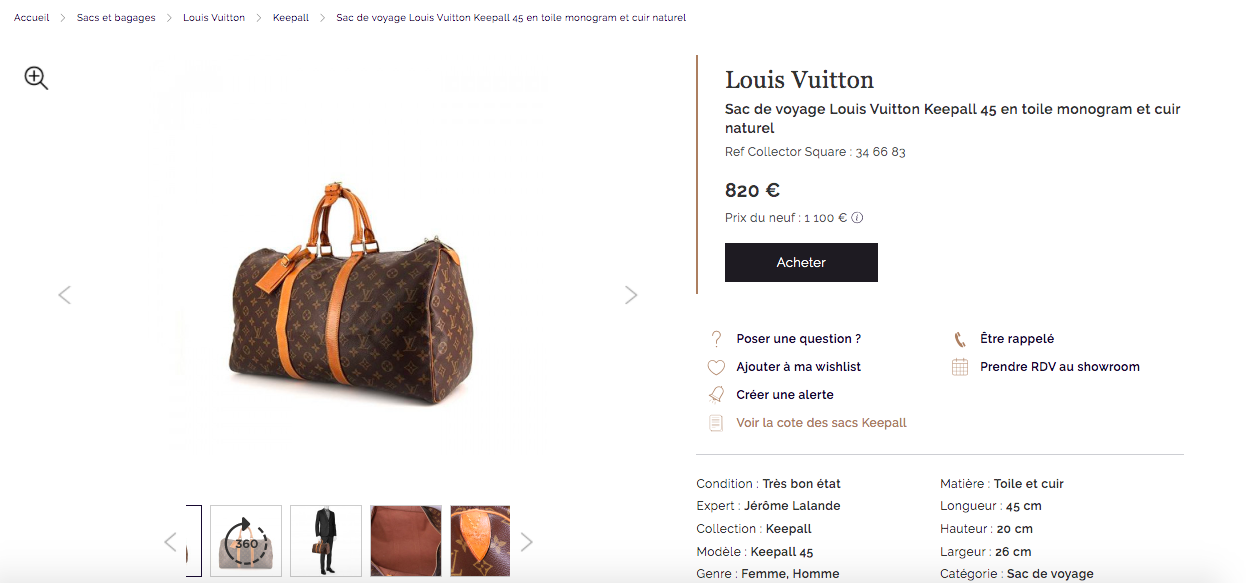

In [22]:
from IPython.display import Image
Image(filename='/Users/samitahri/Documents/py_files/one_bag.png') 

***But, obviously, we need to do it for many different products from the online store:***

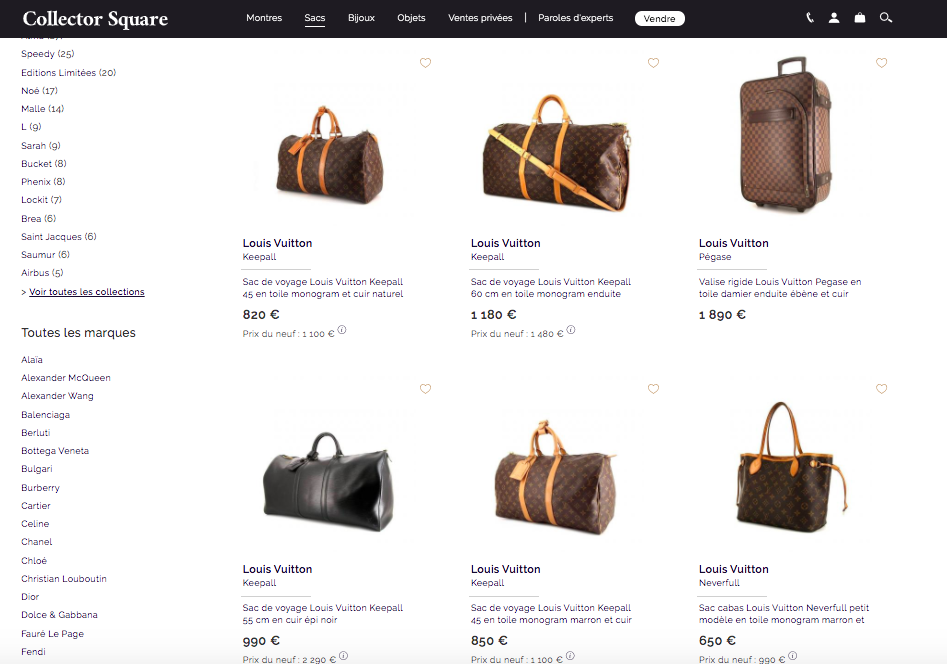

In [23]:
Image(filename='/Users/samitahri/Documents/py_files/multiple_bag.png') 

*To do that, we need to create a list containing all the links which redirect to the different bags.
After filtering the bags to display only the ones we are interested in, we need to analyse the big page presenting all the filtered products (the one above). We will then scrap the different links.*

### A) Gathering of bags links for ONE page

___

In [24]:
catalogue_link = "https://www.collectorsquare.com/sacs/louis-vuitton/?filters[genders][0]=lad&filters[bag_category][0]=bag-xxxxx&filters[bag_category][1]=shoulderx&filters[bag_category][2]=shoppgbag&filters[bag_category][3]=backpabag&filters[bag_category][4]=luggage-x&filters[bag_category][5]=businessx&filters[bag_category][6]=pockthand&filters[bag_category][7]=other-bag&limit=90"

big_page = requests.get(catalogue_link)
big_soup = BeautifulSoup(big_page.content, 'html.parser')

big_soup

<!DOCTYPE html>

<html class="no-js preload-css" lang="fr_FR" xmlns:og="http://ogp.me/ns#">
<head>
<meta charset="utf-8"/>
<title>                    Sacs Louis Vuitton d'Occasion | Collector Square
                </title>
<meta content="Sacs &lt;span class='nowrap'&gt;Louis Vuitton&lt;/span&gt;" property="og:title"/>
<meta content="Achetez et Vendez vos Sacs de Luxe sur Collector Square. Tous les Sacs sont Sélectionnés et Expertisés. Expédition sous 24h." property="og:description"/>
<meta content="https://www.collectorsquare.com/bundles/csfront/img/banner/header-banner-bag-lvuitt.jpg" property="og:image"/>
<meta content="https://www.collectorsquare.com/sacs/louis-vuitton/" property="og:url"/>
<meta content="article" property="og:type"/>
<meta content="Collector Square" property="og:site_name"/>
<meta content="fr" property="og:locale"/>
<meta content="width=device-width, initial-scale=1.0, shrink-to-fit=no, maximum-scale=1, user-scalable=0" name="viewport"/><meta content="Sacs Louis V

**We use the Chrome Devtools as explained in this [tutorial](https://www.dataquest.io/blog/web-scraping-tutorial-python/) to know what is the class that contain the datas we need.**

In [25]:
big_outermost = big_soup.find_all("li", class_="product col-sm-4 col-xs-6")

big_outermost

[<li class="product col-sm-4 col-xs-6" data-product-brand="lvuitt" data-product-code="346683" data-product-collection="lvuitt-col-keepall-xx" data-product-model="lvuitt-mod-keepall45x" data-product-name="Sac de voyage Louis Vuitton Keepall 45 en toile monogram et cuir naturel" data-product-price="820" data-product-univers="bag" itemscope="" itemtype="http://schema.org/Product">
 <meta content="https://www.collectorsquare.com/sacs/louis-vuitton/keepall/sac-de-voyage-louis-vuitton-keepall-45-en-toile-monogram-et-cuir-naturel-346683.html" itemprop="url"/>
 <meta content="346683" itemprop="sku"/>
 <a href="/sacs/louis-vuitton/keepall/sac-de-voyage-louis-vuitton-keepall-45-en-toile-monogram-et-cuir-naturel-346683.html" title="Sac de voyage Louis Vuitton Keepall 45 en toile monogram et cuir naturel">
 <img alt="Sac de voyage Louis Vuitton Keepall 45 en toile monogram et cuir naturel" class="lazyload" data-src="/images/products/346683/thumb-sac-de-voyage-louis-vuitton-keepall-45-en-toile-mono

In [26]:
len(big_outermost)

89

**Observation :** our big_outermost subset of the big_soup seems to contain all the bags of the page, as the page actually displays 90 products. We would need to further investigate to understand why we only have 89 elements in our list and not 90.

In [27]:
# Let's find how we scrap the link for the first bag:
link_subset_1 = big_outermost[0].find("a", {"href" :  True})

print(link_subset_1)

<a href="/sacs/louis-vuitton/keepall/sac-de-voyage-louis-vuitton-keepall-45-en-toile-monogram-et-cuir-naturel-346683.html" title="Sac de voyage Louis Vuitton Keepall 45 en toile monogram et cuir naturel">
<img alt="Sac de voyage Louis Vuitton Keepall 45 en toile monogram et cuir naturel" class="lazyload" data-src="/images/products/346683/thumb-sac-de-voyage-louis-vuitton-keepall-45-en-toile-monogram-et-cuir-naturel.jpg" title="Sac de voyage Louis Vuitton Keepall 45 en toile monogram et cuir naturel"/>
<meta content="/images/products/346683/thumb-sac-de-voyage-louis-vuitton-keepall-45-en-toile-monogram-et-cuir-naturel.jpg" itemprop="image"/>
</a>


In [28]:
link_1 = re.search(r'<a href="(.+)" title', str(link_subset_1)).group(1)

print(link_1)

/sacs/louis-vuitton/keepall/sac-de-voyage-louis-vuitton-keepall-45-en-toile-monogram-et-cuir-naturel-346683.html


In [29]:
# Let's generalize it to the whole bags of the page using a list comprehension

bags_link = [re.search(r'<a href="(.+)" title', str(tag.find("a", {"href" :  True}))).group(1) for tag in big_outermost]
                       
print(bags_link)

['/sacs/louis-vuitton/keepall/sac-de-voyage-louis-vuitton-keepall-45-en-toile-monogram-et-cuir-naturel-346683.html', '/sacs/louis-vuitton/keepall/sac-de-voyage-louis-vuitton-keepall-60-cm-en-toile-monogram-enduite-marron-et-cuir-naturel-365284.html', '/sacs/louis-vuitton/pegase/valise-rigide-louis-vuitton-pegase-en-toile-damier-enduite-ebene-et-cuir-marron-366710.html', '/sacs/louis-vuitton/keepall/sac-de-voyage-louis-vuitton-keepall-55-cm-en-cuir-epi-noir-366715.html', '/sacs/louis-vuitton/keepall/sac-de-voyage-louis-vuitton-keepall-45-en-toile-monogram-marron-et-cuir-naturel-366703.html', '/sacs/louis-vuitton/neverfull/sac-cabas-louis-vuitton-neverfull-petit-modele-en-toile-monogram-marron-et-cuir-naturel-363587.html', '/sacs/louis-vuitton/polochon/sac-de-voyage-louis-vuitton-polochon-en-toile-monogram-enduite-marron-et-cuir-naturel-363052.html', '/sacs/louis-vuitton/randonnee/sac-a-dos-louis-vuitton-randonnee-en-toile-monogram-et-cuir-naturel-364898.html', '/sacs/louis-vuitton/saumu

**Still, we need now to generalize it to the different pages, as shown below:**

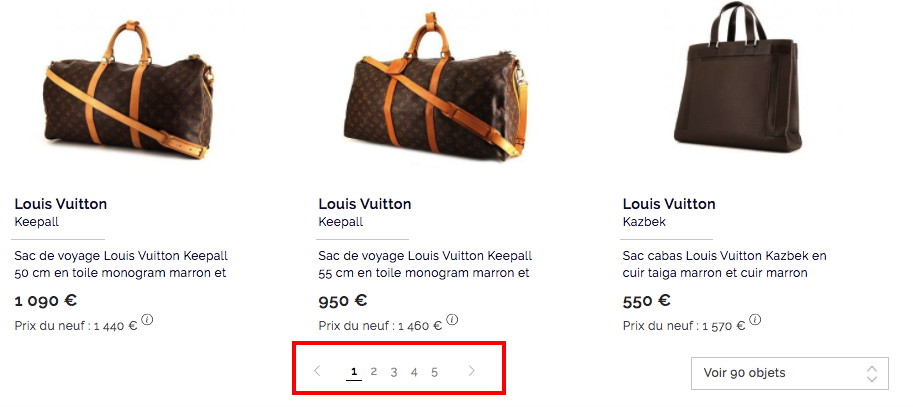

In [30]:
Image(filename='/Users/samitahri/Documents/py_files/different_page.png') 

### B) Gathering of bags links for ALL pages

___

In [31]:
# The pattern here is to add "&page=" with the number of the page we want, at the end of the catalogue_link
# To find this pattern, I basically analyzed the changes in the link when I changed the displayed page.

# Let's gather now the bags links for the whole pages:

all_pages_bags_link = []

for number in range(1,6):
    catalogue_link = "https://www.collectorsquare.com/sacs/louis-vuitton/?filters[genders][0]=lad&filters[bag_category][0]=bag-xxxxx&filters[bag_category][1]=shoulderx&filters[bag_category][2]=shoppgbag&filters[bag_category][3]=backpabag&filters[bag_category][4]=luggage-x&filters[bag_category][5]=businessx&filters[bag_category][6]=pockthand&filters[bag_category][7]=other-bag&limit=90"+"&page="+str(number)
    
    big_page = requests.get(catalogue_link)
    big_soup = BeautifulSoup(big_page.content, 'html.parser')
    big_outermost = big_soup.find_all("li", class_="product col-sm-4 col-xs-6")
    
    bags_link = [re.search(r'<a href="(.+)" title', str(tag.find("a", {"href" :  True}))).group(1) for tag in big_outermost]
    
    for link in bags_link:
        all_pages_bags_link.append(link)

print(len(all_pages_bags_link))


420


**Sanity check** : it seems that our "links scraper" worked well as it contains 420 elements and this number matches the number of bags found when we filtered the catalogue, as you can see below. We just lost one element, and it was during the parsing of the first page when we had 89 elements instead of 90.

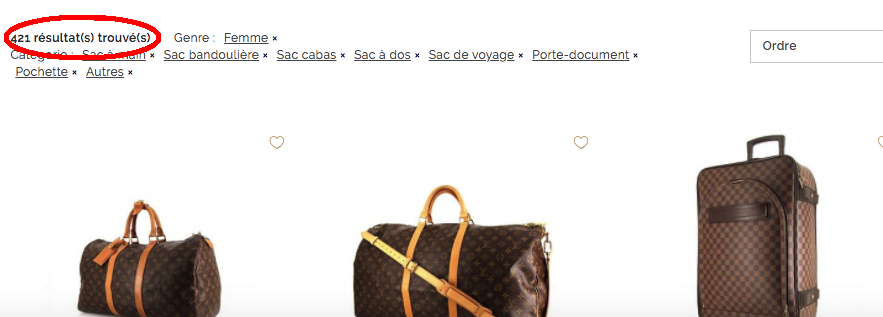

In [32]:
Image(filename='/Users/samitahri/Documents/py_files/results_found.png') 

# Translation : "421 résultat(s) trouvé(s)" means "421 result(s) found" in french

## V. Filling our dataset

Finally, let's fill our dataset to gather all the datas from all the bags from all the pages !

In [33]:
# We need first to delete the row we put in our dataset during the first part of this project (to avoid to have two of them in the table)

bags.drop([0], inplace = True)

print(bags)

Empty DataFrame
Columns: [Photo_link, Brand, Item_name, Matter, Size, Reselling_price, Conditions, Modele, Link]
Index: []


In [41]:
# We loop over the links to scrap the needed datas using the code we wrote above
# We put conditions on all the re.search().group() to handle the cases in which the data is missing on the website

for link in all_pages_bags_link:
    
    full_link = "http://www.collectorsquare.com" + str(link)  # We need to add this beginning the to make it work
    
    # 1) We download the page using the link
    
    page = requests.get(full_link)
    soup = BeautifulSoup(page.content, 'html.parser')
    outermost = soup.find_all("div", class_="product")
    
    # 2) We find the item_name and the price
    
    detailed_paraph = outermost[0].find_all("p", {"data-product-brand": True})
    item_name = detailed_paraph[0]["data-product-name"]
    reselling_price = detailed_paraph[0]["data-product-price"]

    # 3) We find the size
    
    detailed_paraph_2 = outermost[0].find_all("div", {"class": "infos col-md-5"})
    size = detailed_paraph_2[0].find_all("span", {"itemprop" : True})
    depth = detailed_paraph_2[0].find_all("span", {"itemprop" : "depth"})
    height = detailed_paraph_2[0].find_all("span", {"itemprop" : "height"})
    width = detailed_paraph_2[0].find_all("span", {"itemprop" : "width"})
    
    
    size_depth_or_not = re.search(r"(\d+)", str(depth))
    size_height_or_not = re.search(r"(\d+)", str(height))
    size_width_or_not = re.search(r"(\d+)", str(width))
    
    if size_depth_or_not and size_height_or_not and size_width_or_not:
        size_depth = re.search(r"(\d+)", str(depth)).group(1)
        size_height = re.search(r"(\d+)", str(height)).group(1)
        size_width = re.search(r"(\d+)", str(width)).group(1)
        size_total = size_depth+"x"+size_height+"x"+size_width
    else:
        size_total = "None"

    # 4) We find the conditions, the modele and the matter
    
    detailed_paraph_3 = detailed_paraph_2[0].find_all("div", {"class" : "col-xs-6"})
    
    detailed_condition_modele = detailed_paraph_3[0].find_all("div")
    conditions_or_not = re.search(r"<span>(.+)</span>", str(detailed_condition_modele[0]))
    if conditions_or_not:
        conditions = re.search(r"<span>(.+)</span>", str(detailed_condition_modele[0])).group(1)
    else:
        conditions = conditions_or_not
    
    modele_or_not = re.search(r"<span>(.+)</span>", str(detailed_condition_modele[3]))
    if modele_or_not:
        modele = re.search(r"<span>(.+)</span>", str(detailed_condition_modele[3])).group(1)
    else:
        modele = modele_or_not
        
    detailed_matter = detailed_paraph_3[1].find_all("div")
    matter_or_not = re.search(r"<span>(.+)</span>", str(detailed_matter[0]))
    if matter_or_not:
        matter = re.search(r"<span>(.+)</span>", str(detailed_matter[0])).group(1)
    else:
        matter = matter_or_not

    # 4) We find the photo link
    
    photo_incomplete = str(outermost[0]["data-product-image"])
    photo = "www.collectorsquare.com"+str(outermost[0]["data-product-image"])


    # 5) We create the new row
    
    new_row = {"Photo_link": photo, 
     "Brand": "VUITTON", 
     "Item_name": item_name, 
     "Matter": matter, 
     "Size": size_total, 
     "Reselling_price": int(reselling_price), 
     "Conditions": conditions, 
     "Modele": modele, 
     "Link": full_link}

    # 6) We add the new row at the end of the set
    
    bags.loc[len(bags)] = new_row

In [43]:
bags.head()

,Photo_link,Brand,Item_name,Matter,Size,Reselling_price,Conditions,Modele,Link
0,www.collectorsquare.com/images/products/346683...,VUITTON,Sac de voyage Louis Vuitton Keepall 45 en toil...,Toile et cuir,45x20x26,820,Très bon état,Keepall 45,http://www.collectorsquare.com/sacs/louis-vuit...
1,www.collectorsquare.com/images/products/346683...,VUITTON,Sac de voyage Louis Vuitton Keepall 45 en toil...,Toile et cuir,45x20x26,820,Très bon état,Keepall 45,http://www.collectorsquare.com/sacs/louis-vuit...
2,www.collectorsquare.com/images/products/365284...,VUITTON,Sac de voyage Louis Vuitton Keepall 60 cm en t...,None,60x28x26,1180,Très bon état,Keepall 60,http://www.collectorsquare.com/sacs/louis-vuit...
3,www.collectorsquare.com/images/products/366710...,VUITTON,Valise rigide Louis Vuitton Pegase en toile da...,None,36x55x16,1890,Très bon état,Pegase,http://www.collectorsquare.com/sacs/louis-vuit...
4,www.collectorsquare.com/images/products/366715...,VUITTON,Sac de voyage Louis Vuitton Keepall 55 cm en c...,None,55x31x25,990,Très bon état,Keepall 55,http://www.collectorsquare.com/sacs/louis-vuit...


In [46]:
bags.shape

(488, 9)

We notice that the shape attribute above shows that there are more than 420 bags. 
This is maybe because there are some duplicates due to the change of pages.
Let's remove them before exporting our dataframe.

In [71]:
bags.drop_duplicates(inplace = True)
bags.shape

(420, 9)

**Observation** : We now have exactly the same numbers of rows as the numbers of bags displayed once the catalogue is filtered

Congrats ! We can now export our dataset to analyse it using excel :) 

In [73]:
bags.to_excel(excel_writer = "bags_dataset.xlsx", index = False)